# Load the data

In [18]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [19]:
y.shape, tx.shape

((10000,), (10000, 2))

### NB: throughout this laboratory the data has the following format: 
  * there are **N = 10000** data entries
  * **y** represents the column vector containing weight information -- that which we wish to predict/the output (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,)**.
  * **tx** represents the matrix $\tilde{X}$ formed by laterally concatenating a column vector of 1s to the column vector of height information -- the input data (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,2)**.

# 1. Computing the Cost Function
Fill in the `compute_cost` function below:

In [20]:
def compute_loss(y, tx, w):

    """Calculate the loss using either MSE or MAE.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2,). The vector of model parameters.

    Returns:
        the value of the loss (a scalar), corresponding to the input parameters w.
    """
    # ***************************************************
    e = np.abs(y - np.ravel(np.dot(tx, w)))
    return np.sum(e)/e.shape[0]
    
    # ***************************************************

# 2. Grid Search

Fill in the function `grid_search()` below:

In [21]:
from costs import *

def grid_search(y, tx, grid_w0, grid_w1):
    """Algorithm for grid search.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        grid_w0: numpy array of shape=(num_grid_pts_w0, ). A 1D array containing num_grid_pts_w0 values of parameter w0 to be tested in the grid search.
        grid_w1: numpy array of shape=(num_grid_pts_w1, ). A 1D array containing num_grid_pts_w1 values of parameter w1 to be tested in the grid search.
        
    Returns:
        losses: numpy array of shape=(num_grid_pts_w0, num_grid_pts_w1). A 2D array containing the loss value for each combination of w0 and w1
    """

    losses = np.zeros((len(grid_w0), len(grid_w1)))
    # ***************************************************
    
    for w0_index in range(losses.shape[0]):
        for w1_index in range(losses.shape[1]):
            losses[w0_index, w1_index] = compute_loss(y, tx, [[grid_w0[w0_index]],[grid_w1[w1_index]]])
    
    # ***************************************************
    
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=42.42448314678248, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.070 seconds


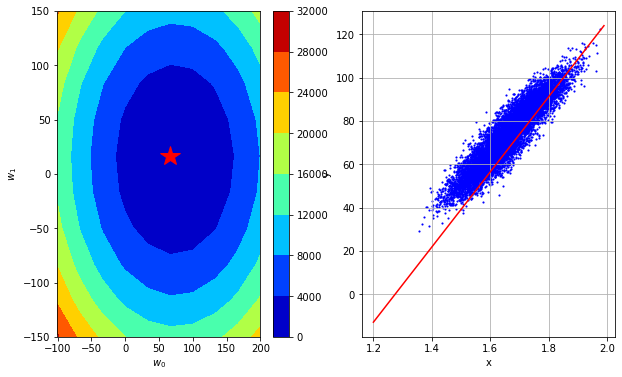

In [22]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3. Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [23]:
def compute_gradient(y, tx, w):
    """Computes the gradient at w.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.
        
    Returns:
        An numpy array of shape (2, ) (same shape as w), containing the gradient of the loss at w.
    """
    # ***************************************************
    
    e = y - np.ravel(np.dot(tx, w));   
    return - np.dot(np.transpose(tx), e)/e.shape[0]
    
    # ***************************************************

#y1, tx1 = build_model_data([3,2],[1,3])
#w1 = [100, 20]
#print(compute_gradient(y1, tx1, w1))

Please fill in the functions `gradient_descent` below:

In [24]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """The Gradient Descent (GD) algorithm.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize
        
    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of GD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of GD 
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        w = w - gamma * compute_gradient(y, tx, w)
        # ***************************************************
        # ***************************************************
        loss = compute_loss(y, tx, w)
        # ***************************************************
        
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("GD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [25]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=2264.6350560300057, w0=7.329392200210475, w1=1.3479712434989204
GD iter. 1/49: loss=1837.2777140793814, w0=13.92584518039996, w1=2.5611453626479217
GD iter. 2/49: loss=1491.1182670993776, w0=19.862652862570464, w1=3.653002069882027
GD iter. 3/49: loss=1210.7291150455742, w0=25.205779776523926, w1=4.635673106392729
GD iter. 4/49: loss=983.6139018819919, w0=30.014593999082066, w1=5.520077039252341
GD iter. 5/49: loss=799.6505792194912, w0=34.34252679938437, w1=6.316040578826014
GD iter. 6/49: loss=650.6402878628655, w0=38.237666319656455, w1=7.032407764442313
GD iter. 7/49: loss=529.9419518639996, w0=41.7432918879013, w1=7.677138231496978
GD iter. 8/49: loss=432.1762997049176, w0=44.89835489932168, w1=8.257395651846178
GD iter. 9/49: loss=352.98612145606035, w0=47.73791160960005, w1=8.779627330160464
GD iter. 10/49: loss=288.8420770744868, w0=50.29351264885055, w1=9.249635840643316
GD iter. 11/49: loss=236.8854011254118, w0=52.59355358417602, w1=9.67264350007789
GD it

In [26]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses, gd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4. Stochastic gradient descent

In [27]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient at w from just few examples n and their corresponding y_n labels.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.
        
    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the stochastic gradient of the loss at w.
    """
    
    # ***************************************************
    
    e = y - np.ravel(np.dot(tx, w))
    return -np.dot(np.transpose(tx), e)/e.shape[0]
    
    # ***************************************************
    

def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """The Stochastic Gradient Descent algorithm (SGD).
            
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic gradient
        max_iters: a scalar denoting the total number of iterations of SGD
        gamma: a scalar denoting the stepsize
        
    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SGD 
    """
    
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    
    for n_iter in range(max_iters):
        # ***************************************************
        
        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size):
            w = w - gamma * compute_stoch_gradient(minibatch_y, minibatch_tx, w)
        
        loss = compute_loss(y, tx, w)
        
        ws.append(w)
        losses.append(loss)
        
        # TODO: implement stochastic gradient descent.
        # ***************************************************
        
        print("SGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

In [28]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD iter. 0/49: loss=2375.998873980647, w0=6.555981733057834, w1=-2.86878293518816
SGD iter. 1/49: loss=1659.1062687817473, w0=16.004902587119282, w1=11.153983238542459
SGD iter. 2/49: loss=1382.3433485283413, w0=21.040254532127662, w1=11.61714505203718
SGD iter. 3/49: loss=1111.1422247443516, w0=26.658729625509146, w1=17.562787960732123
SGD iter. 4/49: loss=878.7951736472236, w0=31.754637127227785, w1=14.622683843454668
SGD iter. 5/49: loss=721.3825485372305, w0=35.73481941715673, w1=14.62301219888305
SGD iter. 6/49: loss=622.6692918098693, w0=38.499268488152026, w1=11.505150527621623
SGD iter. 7/49: loss=489.036252716292, w0=42.574728720543796, w1=15.385465258678
SGD iter. 8/49: loss=419.7720926846137, w0=44.92834462428603, w1=15.520895830601056
SGD iter. 9/49: loss=382.14423445598914, w0=46.348526958542706, w1=16.21144798600376
SGD iter. 10/49: loss=318.5454030399195, w0=48.88006345539692, w1=16.686352608675477
SGD iter. 11/49: loss=276.89253044704253, w0=50.970162110850275, w1=18.4

In [29]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(sgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5. Effect of Outliers and MAE Cost Function

In [46]:
import datetime
from helpers import *

# ***************************************************

height, weight, gender = load_data(sub_sample=True, add_outlier=True)
# TODO: reload the data by subsampling first, then by subsampling and adding outliers
# ***************************************************

x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [47]:
y.shape, tx.shape

((202,), (202, 2))

In [32]:
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()

# ***************************************************
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
# TODO: fit the model to the subsampled data / subsampled data with outliers and visualize the cloud of points 
#       and the model fit
# ***************************************************

end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=267.0500258779429, w0=51.54259072181176, w1=10.132993413506084
GD iter. 1/49: loss=36.45002800750045, w0=67.0053679383553, w1=13.172891437557825
GD iter. 2/49: loss=15.696028199160635, w0=71.64420110331838, w1=14.084860844773324
GD iter. 3/49: loss=13.828168216410077, w0=73.03585105280729, w1=14.358451666937965
GD iter. 4/49: loss=13.660060817962522, w0=73.45334603765397, w1=14.440528913587356
GD iter. 5/49: loss=13.644931152102245, w0=73.57859453310797, w1=14.46515208758217
GD iter. 6/49: loss=13.643569482174817, w0=73.61616908174418, w1=14.472539039780616
GD iter. 7/49: loss=13.643446931881353, w0=73.62744144633503, w1=14.474755125440149
GD iter. 8/49: loss=13.643435902354941, w0=73.63082315571229, w1=14.47541995113801
GD iter. 9/49: loss=13.643434909697557, w0=73.63183766852546, w1=14.475619398847368
GD iter. 10/49: loss=13.643434820358397, w0=73.63214202236942, w1=14.475679233160175
GD iter. 11/49: loss=13.643434812317873, w0=73.6322333285226, w1=14.475697183454

In [33]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses, gd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 6. Subgradient descent

In [58]:
def compute_subgradient_mae(y, tx, w):
    """Compute a subgradient of the MAE at w.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.
        
    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the subgradient of the MAE at w.
    """
    # ***************************************************
    e = y - np.ravel(np.dot(tx, w))
    
    def subgradient_abs(x):
        if x>0: 
            return 1 
        elif x<0:
            return -1
        else:
            return 0.1
    
    subgradient_abs = np.vectorize(subgradient_abs)    
    return np.dot(subgradient_abs(e), -tx)/e.shape[0]

    # TODO: compute subgradient gradient vector for MAE
    # ***************************************************

In [59]:
def subgradient_descent(y, tx, initial_w, max_iters, gamma):
    """The SubGradient Descent (SubGD) algorithm.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize
        
    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubGD 
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        g = compute_subgradient_mae(y, tx, w)
        loss = compute_loss(y, tx, w)
        # TODO: compute subgradient and loss
        # ***************************************************

        # ***************************************************
        w = w - gamma * g
        # TODO: update w by subgradient
        # ***************************************************
        
        ws.append(w)
        losses.append(loss)
        print("SubGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

In [60]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subgd_losses, subgd_ws = subgradient_descent(
    y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubGD: execution time={t:.3f} seconds".format(t=exection_time))

SubGD iter. 0/499: loss=2869.8351145358524, w0=0.7, w1=6.109524327590712e-16
SubGD iter. 1/499: loss=2818.2326504374037, w0=1.4, w1=1.2219048655181425e-15
SubGD iter. 2/499: loss=2767.120186338956, w0=2.0999999999999996, w1=1.832857298277214e-15
SubGD iter. 3/499: loss=2716.4977222405073, w0=2.8, w1=2.443809731036285e-15
SubGD iter. 4/499: loss=2666.365258142059, w0=3.5, w1=3.054762163795356e-15
SubGD iter. 5/499: loss=2616.72279404361, w0=4.2, w1=3.665714596554428e-15
SubGD iter. 6/499: loss=2567.570329945162, w0=4.9, w1=4.276667029313499e-15
SubGD iter. 7/499: loss=2518.9078658467133, w0=5.6000000000000005, w1=4.887619462072571e-15
SubGD iter. 8/499: loss=2470.735401748265, w0=6.300000000000001, w1=5.498571894831642e-15
SubGD iter. 9/499: loss=2423.052937649816, w0=7.000000000000001, w1=6.109524327590714e-15
SubGD iter. 10/499: loss=2375.8604735513677, w0=7.700000000000001, w1=6.720476760349785e-15
SubGD iter. 11/499: loss=2329.1580094529195, w0=8.4, w1=7.331429193108857e-15
SubGD it

In [65]:
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subgd_losses, subgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(subgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

# Stochastic Subgradient Descent

**NB** for the computation of the subgradient you can reuse the `compute_subgradient` method that you implemented above, just making sure that you pass in a minibatch as opposed to the full data.

In [62]:
def stochastic_subgradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """The Stochastic SubGradient Descent algorithm (SubSGD).
            
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic subgradient
        max_iters: a scalar denoting the total number of iterations of SubSGD
        gamma: a scalar denoting the stepsize
        
    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubSGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubSGD 
    """
    
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    
    for n_iter in range(max_iters):

        # ***************************************************
        for minibatch_y, minibatch_tx in batch_iter(y, tx, 1):
            g = compute_subgradient_mae(minibatch_y, minibatch_tx, w)
            
        loss = compute_loss(y, tx, w)
        w = w - gamma * g
        
        losses.append(loss)
        ws.append(w)
        # TODO: implement stochastic subgradient descent.
        # ***************************************************
        
        print("SubSGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

In [63]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subsgd_losses, subsgd_ws = stochastic_subgradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubSGD: execution time={t:.3f} seconds".format(t=exection_time))

SubSGD iter. 0/499: loss=2869.8351145358524, w0=0.7, w1=0.27812696880168786
SubSGD iter. 1/499: loss=2815.202225882669, w0=1.4, w1=-0.8116680542715324
SubSGD iter. 2/499: loss=2776.4062604990863, w0=2.0999999999999996, w1=-0.07739231077973341
SubSGD iter. 3/499: loss=2717.354733038282, w0=2.8, w1=-0.4595182953300683
SubSGD iter. 4/499: loss=2671.541572751897, w0=3.5, w1=-0.8992067004152527
SubSGD iter. 5/499: loss=2627.0497317905215, w0=4.2, w1=-0.18104337638406443
SubSGD iter. 6/499: loss=2569.5845129218105, w0=4.9, w1=-0.3652041547023844
SubSGD iter. 7/499: loss=2523.0045423357824, w0=5.6000000000000005, w1=-0.16868407192388166
SubSGD iter. 8/499: loss=2472.6110399055724, w0=6.300000000000001, w1=0.9996467285935869
SubSGD iter. 9/499: loss=2412.52158788765, w0=7.000000000000001, w1=0.22882366252539954
SubSGD iter. 10/499: loss=2373.3616086268157, w0=7.700000000000001, w1=0.6523649155794151
SubSGD iter. 11/499: loss=2322.1720211867805, w0=8.4, w1=2.192427253966601
SubSGD iter. 12/499:

In [64]:
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subsgd_losses, subsgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(subsgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>